In [17]:
%matplotlib inline
print('-- ')
print('-- Make plots (the smart way) in python')
print('-- (much material from presentation by John D West 2015)')
print('-- (rest from Karen Olsen 2016)')
print('-- ')
print('We will go through:')
print('1) Simple object-oriented plotting')
print('2) Adding a second axis')
print('3) Having several plots in one figure (sub-plotting)')
print('4) Setting the defaults for plotting')
print('5) ...')

-- 
-- Make plots (the smart way) in python
-- (much material from presentation by John D West 2015)
-- (rest from Karen Olsen 2016)
-- 
We will go through:
1) Simple object-oriented plotting
2) Adding a second axis
3) Having several plots in one figure (sub-plotting)
4) Setting the defaults for plotting
5) ...


In [18]:
# Import the modules that we will need for plotting
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [19]:
# Load some data: In this case, tides on the Earth, one measurement per hour
tide_kPa = np.load('Tide.npy')
t_hours = np.arange(len(tide_kPa))
P_kPa = np.load('BP.npy')

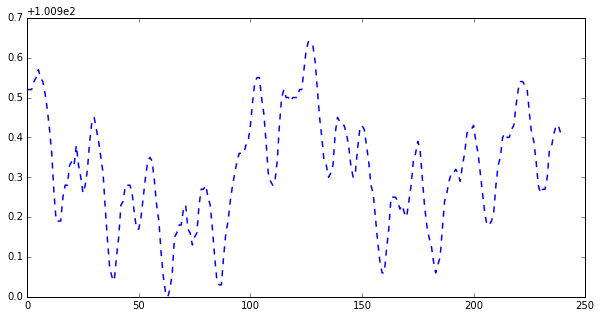

In [20]:
# 1) Simple object-oriented plotting
# In this presentation we will use an object-oriented way to make plots.
# That means we make an axes 'object' that we add to:
plt.close('all') # to close all open windows
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
# Now, we can use a lot of matplotlib functions on the 'ax1' object 
# (in ipython hit tab after 'ax1.' to see all your options)
ax1.plot(t_hours, P_kPa, color='blue', linewidth = 1.5, \
         linestyle='--', label='Barometric Pressure')
# Or, in short-hand notation:
# ax1.plot(t_hours, BP, c='blue', lw = 1.5, ls='--', label='Barometric Pressure')
# Let's take a look
plt.show()

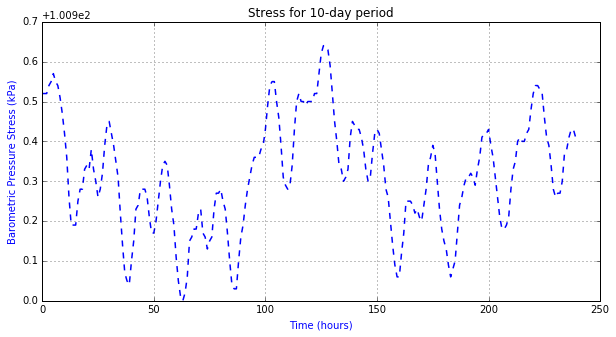

In [21]:
# Let's put some axis labels and a title on there:
fig = plt.figure(figsize=(10,5)) 
# A note: In ipython you can keep writing to the same figure, 
# but in notebook we need to start a new figure
ax1 = fig.add_subplot(111)
ax1.plot(t_hours, P_kPa, color='blue', linewidth = 1.5, \
         linestyle='--', label='Barometric Pressure')
ax1.set_ylabel('Barometric Pressure Stress (kPa)', color='blue')
ax1.set_xlabel('Time (hours)', color='blue')
ax1.set_title('Stress for 10-day period')
# Add grid lines
ax1.grid(True)
plt.show()

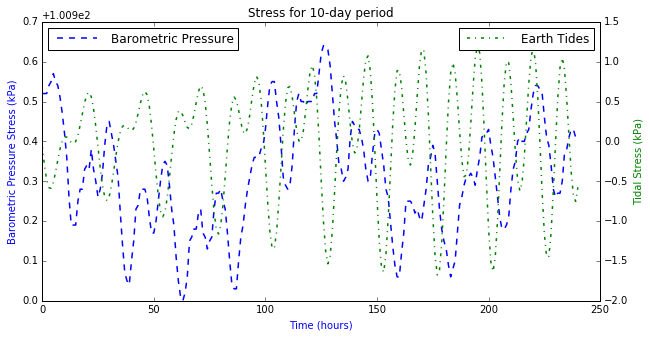

In [22]:
# 2) Adding a second axis
# We can also add a SECOND axis by creating another object:
fig = plt.figure(figsize=(10,5)) 
ax1 = fig.add_subplot(111)
ax1.plot(t_hours, P_kPa, color='blue', linewidth = 1.5, \
         linestyle='--', label='Barometric Pressure')
ax1.set_ylabel('Barometric Pressure Stress (kPa)', color='blue')
ax1.set_xlabel('Time (hours)', color='blue')
ax1.set_title('Stress for 10-day period')
ax2 = ax1.twinx()
ax2.set_ylabel('Tidal Stress (kPa)', color='green')
ax2.plot(t_hours, tide_kPa, color='green', linewidth=1.5, \
         linestyle = '-.', label='Earth Tides')
# And add legends to tell the two datasets apart:
ax1.legend(loc='upper left',handlelength=4)
ax2.legend(loc='upper right',handlelength=4)
plt.show()

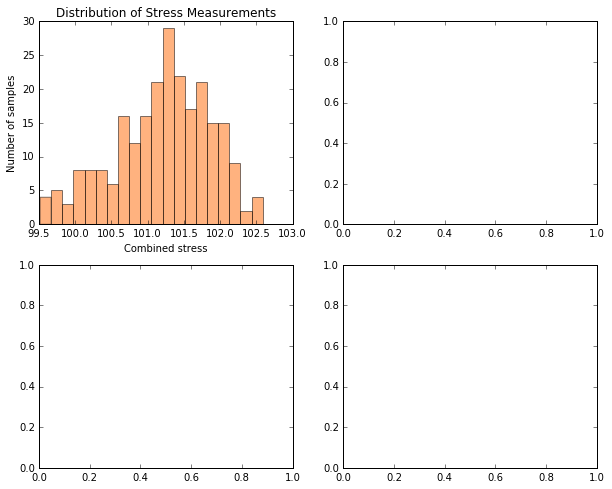

In [39]:
# 3) Having several plots in one figure (sub-plotting)
# A quick way to set up all axes in one line:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,8))
# which is the same as:
# fig = plt.figure()
# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)
# Matplotlib has a routine for making histograms:
ax1.hist(tide_kPa + P_kPa, bins=20, color='#ff6600', alpha=0.5)
ax1.set_ylabel('Number of samples')
ax1.set_xlabel('Combined stress')
ax1.set_title('Distribution of Stress Measurements',fontsize=12)
plt.show()

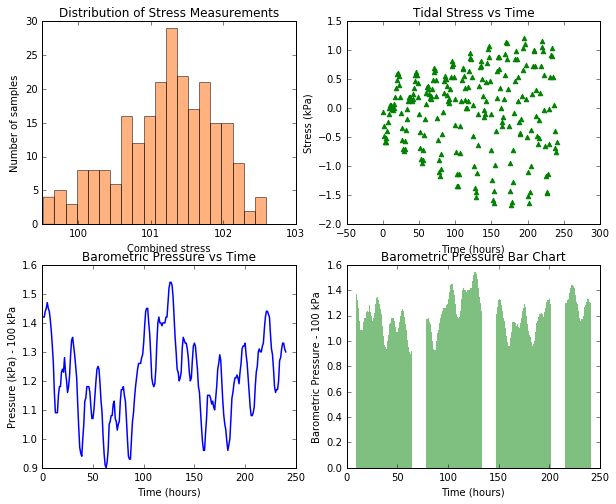

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,8))
ax1.hist(tide_kPa + P_kPa, bins=20, color='#ff6600', alpha=0.5)
ax1.set_ylabel('Number of samples')
ax1.set_xlabel('Combined stress')
ax1.set_title('Distribution of Stress Measurements',fontsize=12)
# The x-axis got a little bit crammed, we can change that:
ax1.xaxis.major.locator.set_params(nbins=4)
# Matplotlib can also do a simple scatter plot:
ax2.scatter(t_hours, tide_kPa, color='green', marker='^')
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Stress (kPa)')
ax2.set_title('Tidal Stress vs Time')
# Let's do another line plot:
ax3.plot(t_hours, P_kPa-100., color='blue', linewidth = 1.5)
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Pressure (kPa) - 100 kPa')
ax3.set_title('Barometric Pressure vs Time')
ax4.bar(t_hours,P_kPa-100.,facecolor='green',lw=0,alpha=0.5)
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Barometric Pressure - 100 kPa')
ax4.set_title('Barometric Pressure Bar Chart')
# A smart way to adjust fontsizes that works (most of the time):
plt.show()